In [ ]:
# importing the required libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate

# MNIST Database

---
<br>
The MNIST database of handwritten digits has a training set of 60,000 28x28 grayscale images, and a test set of 10,000 examples.

In [ ]:
# importing the MNIST dataset
mnist = tf.keras.datasets.mnist

In [ ]:
# loading train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [ ]:
# finding the dimensions of each image
x_train.shape

(60000, 28, 28)

In [ ]:
# normalizing the data
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
# building a model with one convolution layer
mnist_model1 = tf.keras.Sequential()
mnist_model1.add(tf.keras.Input(shape=(28, 28, 1)))
mnist_model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding="valid"))
mnist_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
mnist_model1.add(tf.keras.layers.Flatten())
mnist_model1.add(tf.keras.layers.Dense(100, activation="relu"))
mnist_model1.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [ ]:
# training the model
mnist_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history1 = mnist_model1.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 10s 5ms/step - loss: 0.1464 - accuracy: 0.9571 - val_loss: 0.0608 - val_accuracy: 0.9839
Epoch 2/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0489 - val_accuracy: 0.9862
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0482 - val_accuracy: 0.9856
Epoch 4/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0532 - val_accuracy: 0.9867
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0492 - val_accuracy: 0.9879
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0429 - val_accuracy: 0.9889
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0434 - val_accuracy

In [ ]:
# testing the model
mnist1 = mnist_model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9897


In [ ]:
# building a model with two convolution layers
mnist_model2 = tf.keras.Sequential()
mnist_model2.add(tf.keras.Input(shape=(28, 28, 1)))
mnist_model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid"))
mnist_model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid"))
mnist_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
mnist_model2.add(tf.keras.layers.Flatten())
mnist_model2.add(tf.keras.layers.Dense(100, activation="relu"))
mnist_model2.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               460900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
# training the model
mnist_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history2 = mnist_model2.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.1399 - accuracy: 0.9589 - val_loss: 0.0531 - val_accuracy: 0.9859
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0424 - accuracy: 0.9868 - val_loss: 0.0500 - val_accuracy: 0.9854
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0279 - accuracy: 0.9907 - val_loss: 0.0437 - val_accuracy: 0.9883
Epoch 4/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0608 - val_accuracy: 0.9862
Epoch 5/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0459 - val_accuracy: 0.9893
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0532 - val_accuracy: 0.9878
Epoch 7/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0537 - val_accuracy:

In [ ]:
# testing the model
mnist2 = mnist_model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9897


In [ ]:
# building the LeNet-5 architecture
mnist_lenet5 = tf.keras.Sequential()
mnist_lenet5.add(tf.keras.Input(shape=(28, 28, 1)))
mnist_lenet5.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation="tanh", padding="same"))
mnist_lenet5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
mnist_lenet5.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation="tanh", padding="valid"))
mnist_lenet5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
mnist_lenet5.add(tf.keras.layers.Flatten())
mnist_lenet5.add(tf.keras.layers.Dense(120, activation="sigmoid"))
mnist_lenet5.add(tf.keras.layers.Dense(84, activation="sigmoid"))
mnist_lenet5.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_lenet5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [ ]:
# training the model
mnist_lenet5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history3 = mnist_lenet5.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3379 - accuracy: 0.9135 - val_loss: 0.0739 - val_accuracy: 0.9804
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.0483 - val_accuracy: 0.9866
Epoch 3/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0451 - accuracy: 0.9865 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoch 4/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 6/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0205 - accuracy: 0.9938 - val_loss: 0.0414 - val_accuracy: 0.9878
Epoch 7/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.0408 - val_accuracy:

In [ ]:
# testing the model
mnist3 = mnist_lenet5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9893


# CIFAR-10 Dataset

---
<br>
The CIFAR-10 dataset consists of 60000 32x32 RGB images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The classes are:

*   airplane
*   automobile
*   bird
*   cat
*   deer
*   dog
*   frog
*   horse
*   ship
*   truck

In [ ]:
# importing the CIFAR-10 dataset
cifar = tf.keras.datasets.cifar10

In [ ]:
# loading train and test data
(x_train, y_train), (x_test, y_test) = cifar.load_data() 

In [ ]:
# finding the dimensions of each image
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# finding the number of classes
classes = np.unique(y_train)
print(classes)

[0 1 2 3 4 5 6 7 8 9]


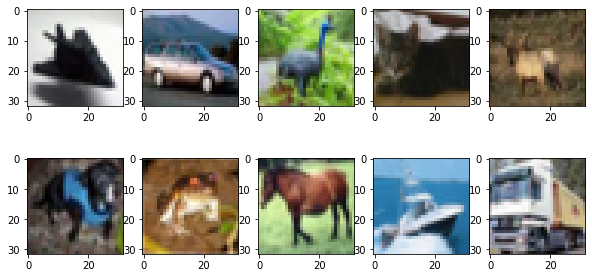

In [ ]:
# displaying an image of each class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))     # subplots (grid with 2 rows, 5 columns)
for i in classes:
  idx = y_train.tolist().index(i)                   # first occurrence of each class
  ax = axes[i//5, i%5]
  ax.imshow(x_train[idx])

In [ ]:
# normalizing the data
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
# building a model with one convolution layer
cifar_model1 = tf.keras.Sequential()
cifar_model1.add(tf.keras.Input(shape=(32, 32, 3)))
cifar_model1.add(tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding="valid"))
cifar_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar_model1.add(tf.keras.layers.Flatten())
cifar_model1.add(tf.keras.layers.Dense(100, activation="relu"))
cifar_model1.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               627300    
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

In [ ]:
# training the model
cifar_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history4 = cifar_model1.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4894 - accuracy: 0.4693 - val_loss: 1.4297 - val_accuracy: 0.4983
Epoch 2/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.2097 - accuracy: 0.5731 - val_loss: 1.1990 - val_accuracy: 0.5805
Epoch 3/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0739 - accuracy: 0.6188 - val_loss: 1.2098 - val_accuracy: 0.5867
Epoch 4/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.9611 - accuracy: 0.6633 - val_loss: 1.0883 - val_accuracy: 0.6264
Epoch 5/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.8694 - accuracy: 0.6943 - val_loss: 1.0886 - val_accuracy: 0.6309
Epoch 6/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7865 - accuracy: 0.7236 - val_loss: 1.0637 - val_accuracy: 0.6477
Epoch 7/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.7139 - accuracy: 0.7498 - val_loss: 1.1010 - val_accuracy:

In [ ]:
# testing the model
cifar1 = cifar_model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.2699 - accuracy: 0.6113


In [ ]:
# building a model with two convolution layers
cifar_model2 = tf.keras.Sequential()
cifar_model2.add(tf.keras.Input(shape=(32, 32, 3)))
cifar_model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid"))
cifar_model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid"))
cifar_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar_model2.add(tf.keras.layers.Flatten())
cifar_model2.add(tf.keras.layers.Dense(100, activation="relu"))
cifar_model2.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 6272)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               627300    
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                      

In [ ]:
# training the model
cifar_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history5 = cifar_model2.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1329/1329 [==============================] - 7s 5ms/step - loss: 1.3886 - accuracy: 0.5026 - val_loss: 1.1150 - val_accuracy: 0.6091
Epoch 2/20
1329/1329 [==============================] - 6s 4ms/step - loss: 1.0172 - accuracy: 0.6425 - val_loss: 1.0725 - val_accuracy: 0.6283
Epoch 3/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.8669 - accuracy: 0.6975 - val_loss: 0.9840 - val_accuracy: 0.6657
Epoch 4/20
1329/1329 [==============================] - 6s 4ms/step - loss: 0.7507 - accuracy: 0.7370 - val_loss: 0.9860 - val_accuracy: 0.6664
Epoch 5/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.6420 - accuracy: 0.7753 - val_loss: 0.9709 - val_accuracy: 0.6848
Epoch 6/20
1329/1329 [==============================] - 6s 4ms/step - loss: 0.5343 - accuracy: 0.8140 - val_loss: 1.0179 - val_accuracy: 0.6777
Epoch 7/20
1329/1329 [==============================] - 5s 4ms/step - loss: 0.4381 - accuracy: 0.8468 - val_loss: 1.1181 - val_accuracy:

In [ ]:
# testing the model
cifar2 = cifar_model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.0596 - accuracy: 0.6358


In [ ]:
# building the LeNet-5 architecture
cifar_lenet5 = tf.keras.Sequential()
cifar_lenet5.add(tf.keras.Input(shape=(32, 32, 3)))
cifar_lenet5.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation="tanh", padding="valid"))
cifar_lenet5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar_lenet5.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation="tanh", padding="valid"))
cifar_lenet5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
cifar_lenet5.add(tf.keras.layers.Flatten())
cifar_lenet5.add(tf.keras.layers.Dense(120, activation="sigmoid"))
cifar_lenet5.add(tf.keras.layers.Dense(84, activation="sigmoid"))
cifar_lenet5.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_lenet5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

In [ ]:
# training the model
cifar_lenet5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
epochs = 20

history6 = cifar_lenet5.fit(x_train, y_train, batch_size, epochs, validation_split=0.15)

Epoch 1/20
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7421 - accuracy: 0.3637 - val_loss: 1.5402 - val_accuracy: 0.4324
Epoch 2/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.4602 - accuracy: 0.4689 - val_loss: 1.3963 - val_accuracy: 0.4865
Epoch 3/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.3363 - accuracy: 0.5155 - val_loss: 1.2981 - val_accuracy: 0.5333
Epoch 4/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.2412 - accuracy: 0.5536 - val_loss: 1.2479 - val_accuracy: 0.5619
Epoch 5/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1740 - accuracy: 0.5806 - val_loss: 1.2070 - val_accuracy: 0.5647
Epoch 6/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.1186 - accuracy: 0.6020 - val_loss: 1.1589 - val_accuracy: 0.5885
Epoch 7/20
1329/1329 [==============================] - 5s 4ms/step - loss: 1.0708 - accuracy: 0.6201 - val_loss: 1.1630 - val_accuracy:

In [ ]:
# testing the model
cifar3 = cifar_lenet5.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2333 - accuracy: 0.5968


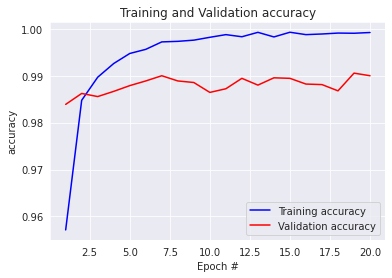

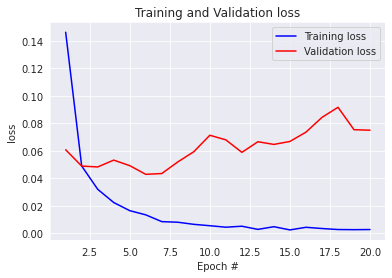

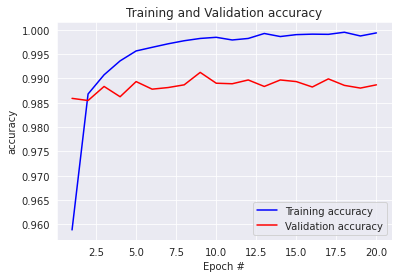

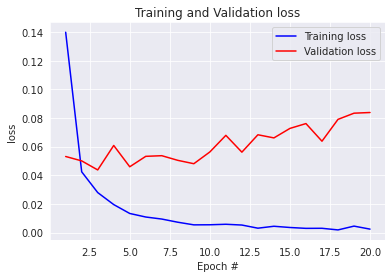

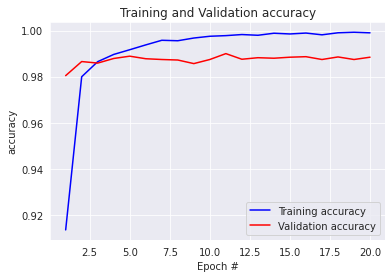

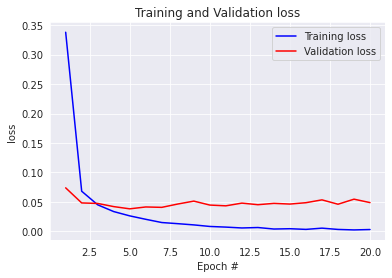

In [ ]:
# plotting the training and validation accuracy and loss for MNIST
mnist_histories = [history1, history2, history3]

sns.set_style("darkgrid")
for history in mnist_histories:
  
  # get the details form the history object
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accuracy')
  plt.legend()

  plt.figure()
  # Train and validation loss
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  print("\n")

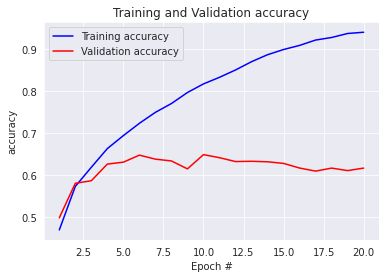

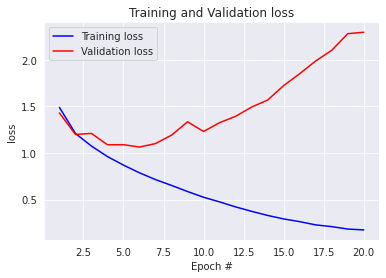

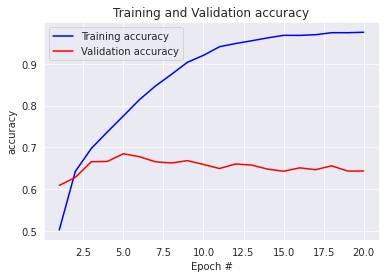

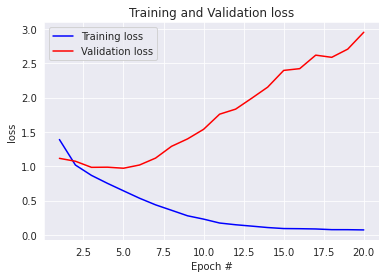

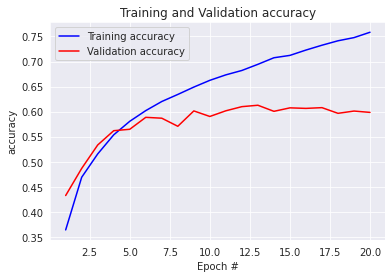

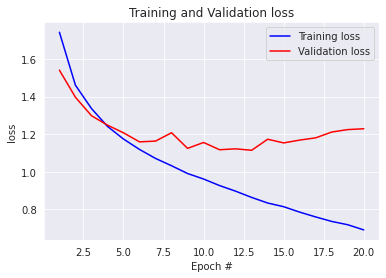

In [ ]:
# plotting the training and validation accuracy and loss for CIFAR-10
cifar_histories = [history4, history5, history6]

sns.set_style("darkgrid")
for history in cifar_histories:
  
  #get the details form the history object
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accuracy')
  plt.legend()

  plt.figure()
  #Train and validation loss
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  print("\n")

In [ ]:
# tabulating all the results for comparison

table = [['Dataset', '1 conv layer', '2 conv layers', 'LeNet-5'],
         ['MNIST', mnist1[1], mnist2[1], mnist3[1]],
         ['CIFAR-10', cifar1[1], cifar2[1], cifar3[1]]]

print(tabulate.tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤════════════════╤═════════════════╤═══════════╕
│ Dataset   │   1 conv layer │   2 conv layers │   LeNet-5 │
╞═══════════╪════════════════╪═════════════════╪═══════════╡
│ MNIST     │         0.9897 │          0.9897 │    0.9893 │
├───────────┼────────────────┼─────────────────┼───────────┤
│ CIFAR-10  │         0.6113 │          0.6358 │    0.5968 │
╘═══════════╧════════════════╧═════════════════╧═══════════╛


The MNIST dataset is very simple and it is easy to achieve a high train and test accuracy of ~99% on it using all three models.

All three models perform well on the train set in the case of the CIFAR-10 dataset (94%, 97%, 82%). However, they perform quite badly on the test set (61%, 63%, 59%). This indicates overfitting on the train set.

Overall, the model with 2 convolution layers seems to be performing and generalizing the best.